## Python project - Prediction of Customer Segmentation

In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Upload the data
df = pd.read_csv("train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Data Cleaning

In [3]:
# We drop the observations that contain NaN in any of their columns
data = df.dropna()
data = data.drop(['ID'], axis=1)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [4]:
# Convert the data to numerical for train data

data.Gender = pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

data.Segmentation = pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes

data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes

data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

data.Var_1=pd.Categorical(data.Var_1,categories=['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],ordered=True).codes

data.Profession=pd.Categorical(data.Profession,categories=['Artist','Entertainment','Healthcare','Engineer','Doctor','Lawyer','Executive','Homemaker','Marketing'],ordered=True).codes

In [5]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,2,1.0,0,4.0,3,3
2,1,1,67,1,3,1.0,0,1.0,5,1
3,0,1,67,1,5,0.0,2,2.0,5,1
5,0,1,56,0,0,0.0,1,2.0,5,2
6,0,0,32,1,2,1.0,0,3.0,5,2


In [6]:
# Drop the variable Segmentation from the data Frame and name the other columns as X
X = data.drop(columns = 'Segmentation')
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,2,1.0,0,4.0,3
2,1,1,67,1,3,1.0,0,1.0,5
3,0,1,67,1,5,0.0,2,2.0,5
5,0,1,56,0,0,0.0,1,2.0,5
6,0,0,32,1,2,1.0,0,3.0,5


In [7]:
# Create a new dataframe y for only segmentation as dependent variable
y = data["Segmentation"]
y = pd.DataFrame(y)
y.head()

,Segmentation
0,3
2,1
3,1
5,2
6,2


### Upload test data and fill the nulls 

In [8]:
# Upload the test dataset (without the Segmentation variable)
X_test = pd.read_csv('test.csv')
X_test = X_test.drop(['ID'], axis=1)
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [9]:
print(X_test["Gender"].isnull().sum())


0


In [10]:
# Gender - NaN filled with Yes since the majority were Yes
print(X_test["Graduated"].value_counts())
# Fill the gaps with Yes - Graduated
X_test['Graduated'].fillna('Yes',inplace=True)
# Graduated
print(X_test["Graduated"].isnull().sum())

Yes    1602
No     1001
Name: Graduated, dtype: int64
0


In [11]:
#Ever_Married
print(X_test["Ever_Married"].isnull().sum())
#values
print(X_test["Ever_Married"].value_counts())
#fill
X_test['Ever_Married'].fillna('Yes',inplace=True)
print(X_test["Ever_Married"].isnull().sum())

50
Yes    1520
No     1057
Name: Ever_Married, dtype: int64
0


In [12]:
# Age
print(X_test["Age"].isnull().sum())

0


In [13]:
# Profession
print(X_test["Profession"].isnull().sum())
print(X_test["Profession"].value_counts())

38
Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64


In [14]:
# Profession fill
X_test['Profession'].fillna(method="ffill",inplace=True)
print(X_test["Profession"].isnull().sum())


0


In [15]:
# Work Experience - fill by mean value
print(X_test["Work_Experience"].isnull().sum())
#mean
print(X_test["Work_Experience"].mean(skipna=True))
# fill
X_test['Work_Experience'].fillna(2.6,inplace=True)
print(X_test["Work_Experience"].isnull().sum())

269
2.552586938083121
0


In [16]:
# Spendig_score
print(X_test["Spending_Score"].isnull().sum())

0


In [17]:
# Family size - fill by mean
print(X_test["Family_Size"].isnull().sum())
#mean
print(X_test["Family_Size"].mean(skipna=True))
#fill
X_test['Family_Size'].fillna(3.0,inplace=True)
print(X_test["Family_Size"].isnull().sum())

113
2.8253778838504378
0


In [18]:
# Var_1 - fill through ffill - automatically
print(X_test["Var_1"].isnull().sum())
#fill
X_test['Var_1'].fillna(method="ffill",inplace=True)
print(X_test["Var_1"].isnull().sum())
# data['Graduated'].fillna('Yes',inplace=True)
# print(data["Graduated"].isnull().sum())

32
0


In [55]:
# Convert the test data to numerical

X_test.Gender = pd.Categorical(X_test.Gender,categories=['Male','Female'],ordered=True).codes

X_test.Ever_Married=pd.Categorical(X_test.Ever_Married,categories=['No','Yes'],ordered=True).codes

X_test.Graduated=pd.Categorical(X_test.Graduated,categories=['No','Yes'],ordered=True).codes

X_test.Spending_Score=pd.Categorical(X_test.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

X_test.Var_1=pd.Categorical(X_test.Var_1,categories=['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],ordered=True).codes

X_test.Profession=pd.Categorical(X_test.Profession,categories=['Artist','Entertainment','Healthcare','Engineer','Doctor','Lawyer','Executive','Homemaker','Marketing'],ordered=True).codes

In [52]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,-1,-1,36,-1,-1,0.0,-1,1.0,-1
1,-1,-1,37,-1,-1,8.0,-1,4.0,-1
2,-1,-1,69,-1,-1,0.0,-1,1.0,-1
3,-1,-1,59,-1,-1,11.0,-1,2.0,-1
4,-1,-1,19,-1,-1,2.6,-1,4.0,-1


In [53]:
# Now, we upload the y_true for the X_test dataset
y_true = pd.read_csv('y.csv')
y_true = y_true.drop(['ID'], axis = 1)
y_true.Segmentation = pd.Categorical(y_true.Segmentation,categories=['A','B','C','D']).codes
y_true = pd.DataFrame(y_true)
y_true

,Segmentation
0,0
1,0
2,0
3,0
4,0
...,...
2622,0
2623,0
2624,0
2625,0


### KNN method

In [31]:
# Import the KNN to make the classification possible, and also import sklearn.metrics to measure the accuracy of predicitons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Create a loop so we can see different accuracies by applying different neighbors values two to twenty
neighbors = np.arange(2,10)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y.values.ravel())
    y_pre = knn.predict(X_test)
    acc = accuracy_score(y_true, y_pre)
    print(acc) # k=2 gives the most accurate 

0.37495241720593836
0.33269889607917774
0.2877807384849638
0.29196802436239055
0.2984392843547773
0.2794061667301104
0.2843547773125238
0.27293490673772364


In [51]:
# We try with the most accurate n_neighbors "2"
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X, y.values.ravel())
y_predict = classifier.predict(X_test)
y_predict = pd.DataFrame(y_predict)
print(y_predict.value_counts()) # most of the costumers fall in 0 (the group A)

0    985
1    727
2    489
3    426
dtype: int64


Text(0.5, 0, 'values')

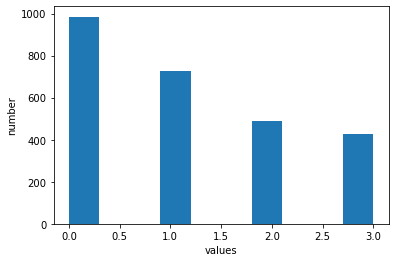

In [48]:
# Plot the histogram with four values A=0, B=1, C=2, D=3
plt.hist(y_predict)
plt.ylabel('number')
plt.xlabel('values')